In [1]:
import tensorflow as tf
import numpy as np

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16775063959770758844, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13736372131608793101
 physical_device_desc: "device: XLA_CPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1663631360
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4662723902775003000
 physical_device_desc: "device: 0, name: GeForce GTX 1060 3GB, pci bus id: 0000:01:00.0, compute capability: 6.1", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 13490201462425810399
 physical_device_desc: "device: XLA_GPU device"]

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
def load_all_cifar_data():
    folder_path = 'cifar-10-python/cifar-10-batches-py'
    data = []
    labels = []
    for i in range(1,6):
        batch = unpickle(f'{folder_path}/data_batch_{i}')
        data.append(batch[b'data'])
        labels.append(batch[b'labels'])
    
    return np.concatenate(tuple(data), axis=0), np.concatenate(tuple(labels), axis=0)

In [5]:
data, labels = load_all_cifar_data()

In [6]:
a = np.zeros((50000,10))
a[np.arange(50000), labels] = 1

labels = a
print(data.shape)
print(labels.shape)

(50000, 3072)
(50000, 10)


In [7]:
model = tf.keras.Sequential()
from tensorflow.keras.layers import Dense
model.add(Dense(units=1024, activation='relu', input_dim=3072))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

W0921 01:39:01.362526 140618519365440 deprecation.py:506] From /home/nagianek/anaconda3/envs/ml-sandbox/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 3,805,450
Trainable params: 3,805,450
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(data, labels, validation_split=0.25, epochs=15, batch_size=64)

Train on 37500 samples, validate on 12500 samples
Epoch 1/15
37500/37500 [==============================] - 3s 77us/sample - loss: 27.6193 - acc: 0.2297 - val_loss: 2.3455 - val_acc: 0.2722
Epoch 2/15
37500/37500 [==============================] - 3s 72us/sample - loss: 2.1077 - acc: 0.3050 - val_loss: 2.2217 - val_acc: 0.2635
Epoch 3/15
37500/37500 [==============================] - 3s 70us/sample - loss: 1.9577 - acc: 0.3261 - val_loss: 1.8609 - val_acc: 0.3395
Epoch 4/15
37500/37500 [==============================] - 3s 67us/sample - loss: 1.8517 - acc: 0.3491 - val_loss: 1.9022 - val_acc: 0.3398
Epoch 5/15
37500/37500 [==============================] - 3s 68us/sample - loss: 1.8343 - acc: 0.3541 - val_loss: 1.8292 - val_acc: 0.3430
Epoch 6/15
37500/37500 [==============================] - 3s 75us/sample - loss: 1.8068 - acc: 0.3646 - val_loss: 1.8195 - val_acc: 0.3444
Epoch 7/15
37500/37500 [==============================] - 3s 67us/sample - loss: 1.7767 - acc: 0.3663 - val_loss: 1

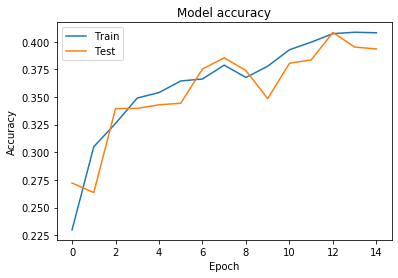

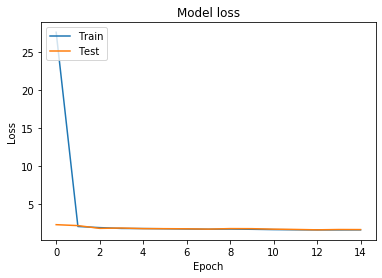

In [11]:
%matplotlib inline

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()